# Neural Network 101
In this example, we will go through the simplest form of a neural network model: a singel input, single output linear function. We expect to predict any used car price based on its mileage using this model.

The following contents will be covered:
1. How to construct a linear model.
2. How to evaluate a model (loss function).
3. How to compute gradient of the loss function.
4. How to update a model.

## Load Raw Data
We will pick 10 samples from the [Used Car Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data). Each sample contains mileage value and price value of a used car. Our goal is to build a linear model to predict any used car's price based on its mileage. In the context of deep learning, we'll refer the mileage data as the input feature; the price data as the label (ground truth).

First, let's load the data as numpy arrays. 

In [1]:
import numpy as np
X_raw = np.array([5.8, 7.1, 1.9, 4.1, 12.8, 6.9, 2.9, 4.3, 1.7, 3.0])  # mileage, x10,000 miles
y_raw = np.array([3.36, 2.26, 3.96, 3.10, 1.5, 2.8, 3.46, 3.5, 3.0, 3.8])  # price, x$10,000
print(f"dimension of raw features array: {X_raw.ndim}, shape of raw features arrary: {X_raw.shape}")  # check dimensions and shape of mileage array
print(f"dimension of raw labels array: {y_raw.ndim}, shape of raw labels arrary: {y_raw.shape}")  # check dimensions and shape of price array


dimension of raw features array: 1, shape of raw features arrary: (10,)
dimension of raw labels array: 1, shape of raw labels arrary: (10,)


## Process Data
We can use the raw data as is, but we will adapt the convention of formatting the features and labels as 2-D (N-dimensional, where N >= 2) arrays. Then the $i$ th sample's feature(s) can be accessed with `feature[i,:]`, and the corresponding label can be accessed with `labels[i]`.


In [2]:
X_reshape = X_raw.reshape(-1, 1)
y_reshape = y_raw.reshape(-1, 1)
print(f"dimension of features array: {X_reshape.ndim}, shape of features arrary: {X_reshape.shape}")  # check dimensions and shape of mileage array
print(f"dimension of labels array: {y_reshape.ndim}, shape of labels arrary: {y_reshape.shape}")  # check dimensions and shape of price array


dimension of features array: 2, shape of features arrary: (10, 1)
dimension of labels array: 2, shape of labels arrary: (10, 1)


## Visualize the Data
Use [matplotlib](https://matplotlib.org/). **Note**: `matplotlib` will auto scale the figure to better fill the space.

Text(0, 0.5, 'Price ($10,000)')

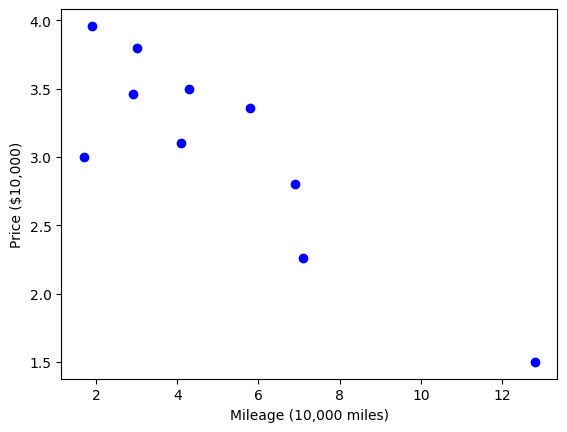

In [3]:
import matplotlib.pyplot as plt
plt.plot(X_reshape, y_reshape, 'bo')
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
# plt.savefig('mile_vs_price-10.png')

## Create an Initial Model
Create a linear model: $y=wx+b$. Initialize two parameters, $w=-1$ for the slope, $b=1$ for the y-axis intersection. **Note:** the figure's scale is different from above, especially on the vertical axis.

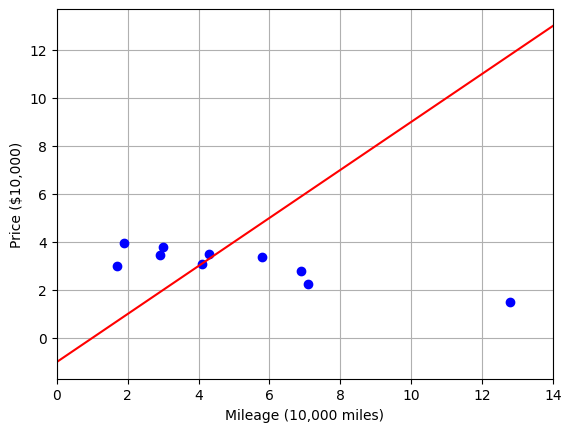

In [4]:
# Create model
def linear(feature, weight, bias):
    prediction = weight * feature + bias
    return prediction
# Visualize the model
w = 1.0
b = -1.0
dimileage = np.array([0, 14]).reshape(-1, 1)  # create 2 coordinates on x-axis
diprice = linear(dimileage, w, b)  # compute y coordinates using initial linear model
plt.plot(X_reshape, y_reshape, 'bo', dimileage, diprice, 'r')  # plot scattered datapoints as well as the model line
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
# plt.savefig('init_model.png')

## Evaluate Model Performance
Use Mean Square Error (MSE) function to evaluate how bad the initial model was.

predicted prices: [ 4.8  6.1  0.9  3.1 11.8  5.9  1.9  3.3  0.7  2. ]
true prices: [3.36 2.26 3.96 3.1  1.5  2.8  3.46 3.5  3.   3.8 ]
prediction - true: [ 1.4400000e+00  3.8400000e+00 -3.0600000e+00 -4.4408921e-16
  1.0300000e+01  3.1000000e+00 -1.5600000e+00 -2.0000000e-01
 -2.3000000e+00 -1.8000000e+00]
model loss: 7.6443200000000004


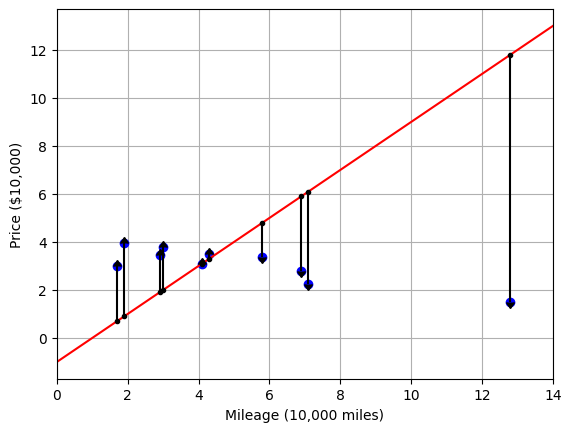

In [5]:
def mse_fn(prediction, label):  # mean square error function
    individual_error = 0.5 * (prediction - label) ** 2
    averaged_error = np.mean(individual_error)
    return averaged_error

# Evaluate initial model
preds = linear(X_reshape, w, b)
print(f"predicted prices: {preds.squeeze()}")
print(f"true prices: {y_reshape.squeeze()}")
err = linear(X_reshape, w, b) - y_reshape
print(f"prediction - true: {err.squeeze()}")
loss = mse_fn(prediction=preds, label=y_reshape)
print(f"model loss: {loss}")

# Plot errors
plt.plot(X_reshape, y_reshape, 'bo', dimileage, diprice, 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(X_reshape.squeeze(), linear(X_reshape, w, b).squeeze(), yerr=abs(err).squeeze(), uplims=err.squeeze()>0, lolims=err.squeeze()<0, fmt='k.')
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
# plt.savefig('model_performance.png')

## Gradient Descent Optimization

In [6]:
# Gradient descent
def grad(prediction, label, feature):
    dw = np.mean((prediction - label) * feature)  # dL/dw
    db = np.mean(prediction - label)  # dL/db

    return dw, db

# Init features and labels
X_train = X_reshape
y_train = y_reshape
# Init parameters
w = 1.0
b = -1.0
num_iters = 400
learning_rate = 0.05
weights = [w]
biases = [b]
losses = []
print(f"initial parameters: w = {w}, b = {b}")
# Optimization
for i in range(num_iters):
    preds = linear(X_train, w, b)
    dw, db = grad(preds, y_train, X_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    mse_loss = mse_fn(preds, y_train)
    print(f"loss @ {i+1} iteration: {mse_loss}")
    weights.append(w)
    biases.append(b)
    losses.append(mse_loss)
print(f"final parameters: w = {w}, b = {b}")


initial parameters: w = 1.0, b = -1.0
loss @ 1 iteration: 7.6443200000000004
loss @ 2 iteration: 6.201040967561549
loss @ 3 iteration: 5.222675903150455
loss @ 4 iteration: 4.5500486993008575
loss @ 5 iteration: 4.078756820543122
loss @ 6 iteration: 3.7403157783389305
loss @ 7 iteration: 3.4897947322573515
loss @ 8 iteration: 3.297708603051835
loss @ 9 iteration: 3.144701364632266
loss @ 10 iteration: 3.0180596328732077
loss @ 11 iteration: 2.9094264594408403
loss @ 12 iteration: 2.8133021522481916
loss @ 13 iteration: 2.726061183637443
loss @ 14 iteration: 2.6453075199556535
loss @ 15 iteration: 2.5694518690355435
loss @ 16 iteration: 2.4974344492087255
loss @ 17 iteration: 2.4285431834444564
loss @ 18 iteration: 2.3622944682290212
loss @ 19 iteration: 2.2983549757615584
loss @ 20 iteration: 2.236490363815599
loss @ 21 iteration: 2.1765316304583995
loss @ 22 iteration: 2.11835303959611
loss @ 23 iteration: 2.0618576343310004
loss @ 24 iteration: 2.006967726288022
loss @ 25 iteration: 

## Observe the Progress
### Did loss decrease?

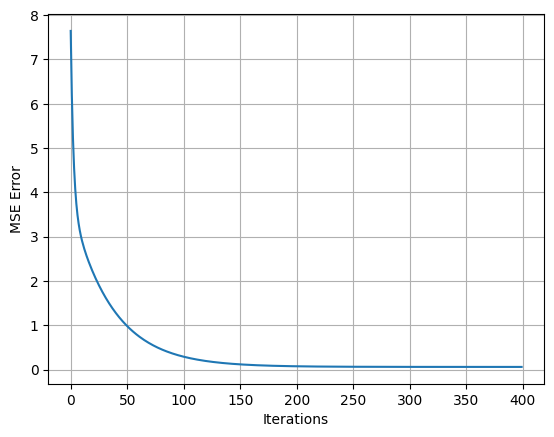

In [7]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Error")
plt.grid()

### How did the model evolve?

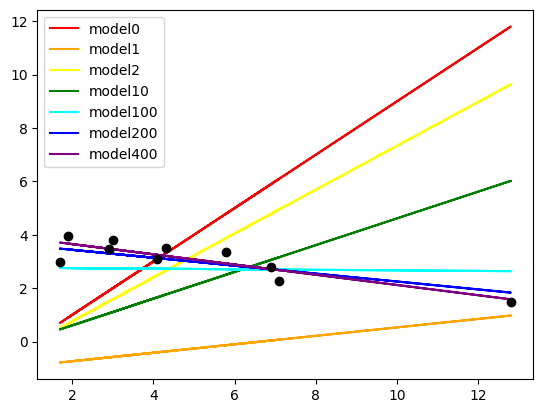

In [8]:
model_0 = linear(X_train, weights[0], biases[0])
model_1 = linear(X_train, weights[1], biases[1])
model_2 = linear(X_train, weights[2], biases[2])
model_10 = linear(X_train, weights[10], biases[10])
model_100 = linear(X_train, weights[100], biases[100])
model_200 = linear(X_train, weights[200], biases[200])
model_400 = linear(X_train, weights[400], biases[400])

plt.plot(X_train, model_0, 'red', label='model0')
plt.plot(X_train, model_1, 'orange', label='model1')
plt.plot(X_train, model_2, 'yellow', label='model2')
plt.plot(X_train, model_10, 'green', label='model10')
plt.plot(X_train, model_100, 'cyan', label='model100')
plt.plot(X_train, model_200, 'blue', label='model200')
plt.plot(X_train, model_400, 'purple', label='model400')
plt.plot(X_train, y_train, 'ko')  # plot scattered datapoints
plt.legend()

Visualize final model's loss on the dataset

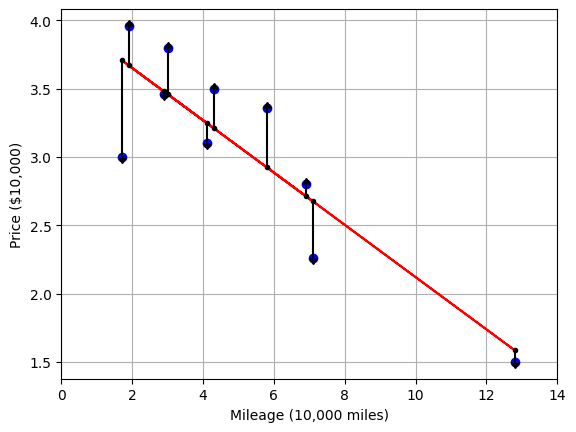

In [9]:
err_400 = linear(X_train, weights[-1], biases[-1]) - y_train
plt.plot(X_train, y_train, 'bo', X_train, model_400, 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(X_train.squeeze(), linear(X_train, w, b).squeeze(), yerr=abs(err_400).squeeze(), uplims=err_400.squeeze()>0, lolims=err_400.squeeze()<0, fmt='k.')
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()

## Evaluate Model on New Data

mse loss: 0.40951854547069455


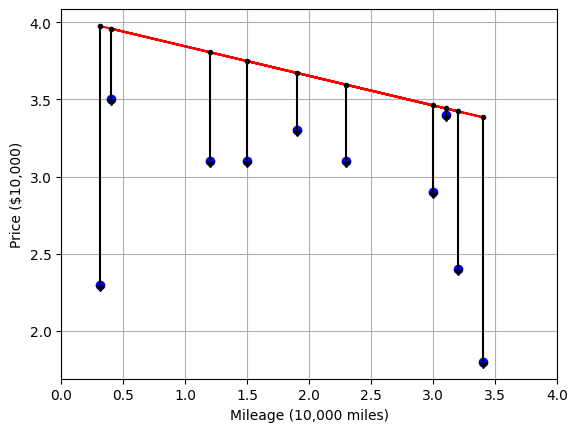

In [10]:
X_test = np.array([0.31, 3.4, 1.9, 1.5 , 3.1, 3.2, 1.2, 0.4, 3.0, 2.3]).reshape(-1, 1)
y_test = np.array([2.3, 1.8, 3.3, 3.1, 3.4, 2.4, 3.1, 3.5, 2.9, 3.1]).reshape(-1, 1)
preds_test = linear(X_test, weights[-1], biases[-1])
err_test = preds_test - y_test
plt.plot(X_test, y_test, 'bo', X_test, linear(X_test, weights[-1], biases[-1]), 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(X_test.squeeze(), preds_test.squeeze(), yerr=abs(err_test).squeeze(), uplims=err_test.squeeze()>0, lolims=err_test.squeeze()<0, fmt='k.')
plt.xlim(0., 4.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
print(f"mse loss: {mse_fn(preds_test, y_test)}")

Seems the model overestimates the prices on this set of cars. Reason? The training dataset only contains 10 samples, these samples are not enough to reflect the general relationship between mileage and price.

## Improve Model with More Data
Let's load 100 samples to further improve the model. We are not going to initialize the model with a random guess this time. Instead, we can continue the training with the previously trained $w$ and $b$. 

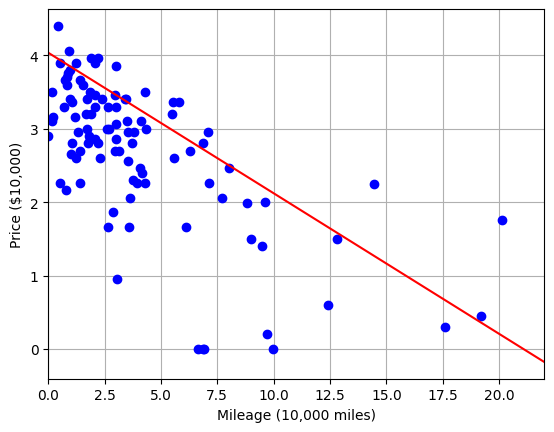

In [11]:
# Load 1000 data points
X100_train = np.load('mileage_100.npy') / 1e4
y100_train = np.load('price_100.npy') / 1e4
# Visualize new data set
dimileage = np.array([0, 22]).reshape(-1, 1)  # create 2 coordinates on x-axis
diprice = linear(dimileage, w, b)  # compute 2 y coordinates
plt.plot(X100_train, y100_train, 'bo', dimileage, diprice, 'r')  # plot scattered datapoints as well as the model line
plt.xlim(0., 22.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()


loss @ 1 iteration: 0.44491308151889614
loss @ 2 iteration: 0.4038831522642125
loss @ 3 iteration: 0.38459940920202196
loss @ 4 iteration: 0.37414033293903265
loss @ 5 iteration: 0.3673374780126026
loss @ 6 iteration: 0.3621199227763345
loss @ 7 iteration: 0.35765444616902414
loss @ 8 iteration: 0.35360254776085326
loss @ 9 iteration: 0.3498236272568566
loss @ 10 iteration: 0.3462563973098154
loss @ 11 iteration: 0.3428714979380405
loss @ 12 iteration: 0.3396525552795081
loss @ 13 iteration: 0.3365886038956545
loss @ 14 iteration: 0.33367104913184525
loss @ 15 iteration: 0.33089244364701825
loss @ 16 iteration: 0.32824598914582326
loss @ 17 iteration: 0.3257253282681258
loss @ 18 iteration: 0.32332445282169225
loss @ 19 iteration: 0.32103765890196634
loss @ 20 iteration: 0.3188595211329907
loss @ 21 iteration: 0.3167848749189228
loss @ 22 iteration: 0.31480880225000063
loss @ 23 iteration: 0.312926619265973
loss @ 24 iteration: 0.31113386484309447
loss @ 25 iteration: 0.309426289896229

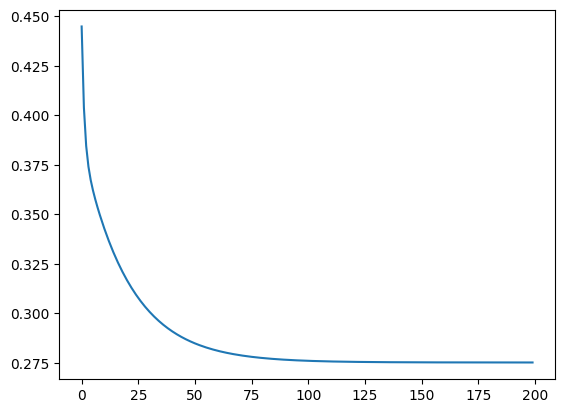

In [12]:
# Continue training
num_iters = 200
learning_rate = 0.05
weights100 = [w]
biases100 = [b]
losses100 = []
for i in range(num_iters):
    preds100 = linear(X100_train, w, b)
    dw, db = grad(preds100, y100_train, X100_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    mse_loss = mse_fn(preds100, y100_train)
    print(f"loss @ {i+1} iteration: {mse_loss}")
    weights100.append(w)
    biases100.append(b)
    losses100.append(mse_loss)

plt.plot(losses100)  # plot training curve



    # dw, db, mse_loss = backward(pred_100, price_100, mileage_100)
    # w = w - learning_rate * dw
    # b = b - learning_rate * db
    # print(f"loss @ {i+1} iteration: {mse_loss}")
    # print(f"w = {w}, b = {b}")
    # weights.append(w)
    # biases.append(b)
    # losses.append(mse_loss)

### Evaluate model on the new dataset
Compare the model trained with 10 samples and the model trained with 100 samples.

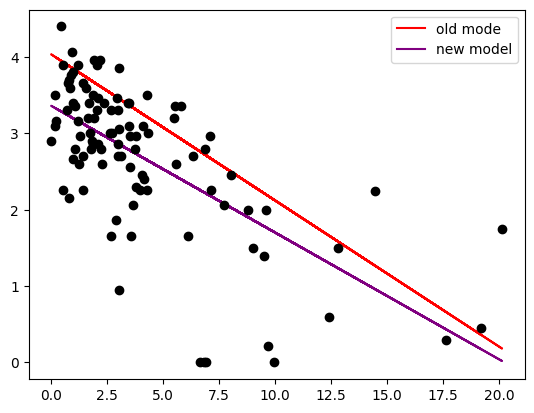

In [13]:
model_old = linear(X100_train, weights100[0], biases100[0])
model_new = linear(X100_train, weights100[-1], biases100[-1])

plt.plot(X100_train, model_old, 'red', label='old mode')
plt.plot(X100_train, model_new, 'purple', label='new model')
plt.plot(X100_train, y100_train, 'ko')  # plot scattered datapoints
plt.legend()

### Test model
Remember the 10-piece test dataset? Let's evaluate the new model on that dataset.


mse loss: 0.1315561068161965


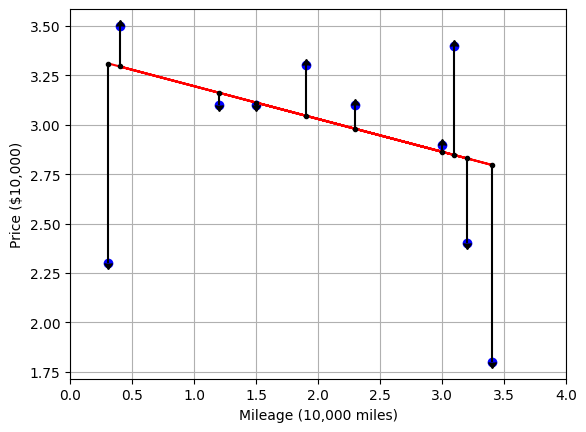

In [14]:
preds_test = linear(X_test, weights100[-1], biases100[-1])
err_test = preds_test - y_test
plt.plot(X_test, y_test, 'bo', X_test, linear(X_test, weights100[-1], biases100[-1]), 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(X_test.squeeze(), preds_test.squeeze(), yerr=abs(err_test).squeeze(), uplims=err_test.squeeze()>0, lolims=err_test.squeeze()<0, fmt='k.')
plt.xlim(0., 4.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
print(f"mse loss: {mse_fn(preds_test, y_test)}")

Looks like the model trained with more samples is doing better.